In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [17]:
df = pd.read_csv("test.csv")

In [18]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [19]:
#Checking for missing values
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [20]:
#Splitting the dataset
X = df.drop('price_range',axis=1)
y = df['price_range']

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape)

(1600, 20) (400, 20)


In [22]:
s = StandardScaler()
X_train_scaled = s.fit_transform(X_train)
X_test_scaled = s.transform(X_test)

In [25]:
#Train the model
kernels = ['linear','poly','rbf']
results = {}

for kernel in kernels:
    model = SVC(kernel=kernel,C=1,random_state=42)
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test,y_pred)
    results[kernel] = acc

    class_names = [f"Price Range {i}" for i in sorted(y.unique())]

    print("Accuracy for ",kernel," is: ",acc)
    print(classification_report(y_test,y_pred,target_names=class_names))
    print(confusion_matrix(y_test,y_pred))

Accuracy for  linear  is:  0.97
               precision    recall  f1-score   support

Price Range 0       1.00      0.93      0.97       105
Price Range 1       0.90      1.00      0.95        91
Price Range 2       1.00      0.95      0.97        92
Price Range 3       0.98      1.00      0.99       112

     accuracy                           0.97       400
    macro avg       0.97      0.97      0.97       400
 weighted avg       0.97      0.97      0.97       400

[[ 98   7   0   0]
 [  0  91   0   0]
 [  0   3  87   2]
 [  0   0   0 112]]
Accuracy for  poly  is:  0.7875
               precision    recall  f1-score   support

Price Range 0       0.89      0.85      0.87       105
Price Range 1       0.67      0.74      0.70        91
Price Range 2       0.66      0.75      0.70        92
Price Range 3       0.94      0.80      0.87       112

     accuracy                           0.79       400
    macro avg       0.79      0.78      0.78       400
 weighted avg       0.80     

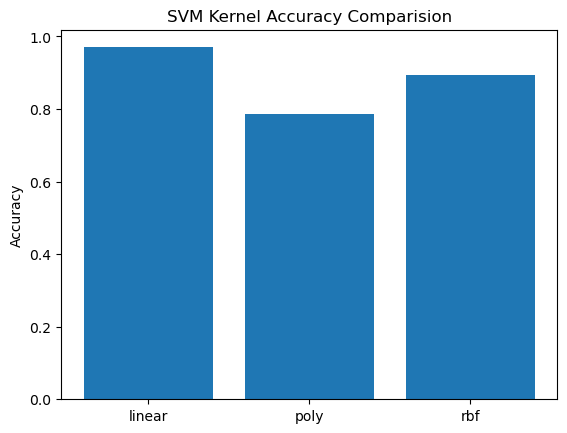

<Figure size 640x480 with 0 Axes>

In [26]:
#Accuracy Comparision
plt.bar(results.keys(),results.values())
plt.title("SVM Kernel Accuracy Comparision")
plt.ylabel('Accuracy')
plt.show()
plt.savefig("svm_acc_1.png")